# Visualizing Simulation Data SNR 
SNR for MC simulations is defined as the square root of the number of detected photons. This aims to demonstrate how that looks like for our data. In this case, we have two types of SNR. Count of photons which have any fetal info and overall photon count. They are named respectively, fetal SNR and SNR.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

FIG_SIZE = (4, 4)
FIG_DPI = 700

SNR_DATA_PATH = Path('../data/snr/snr1.pkl')
snr_data = pd.read_pickle(SNR_DATA_PATH)
snr_data.head()

,SDD,SNR,Fetal SNR,Wave Int,Uterus Thickness,Maternal Wall Thickness
0,10,34763416,355392,2.0,5.0,26.0
1,14,14554830,486602,2.0,5.0,26.0
2,19,7361883,583740,2.0,5.0,26.0
3,23,4602644,648503,2.0,5.0,26.0
4,28,3146096,687988,2.0,5.0,26.0


Text(0.5, 0, 'SDD (mm)')

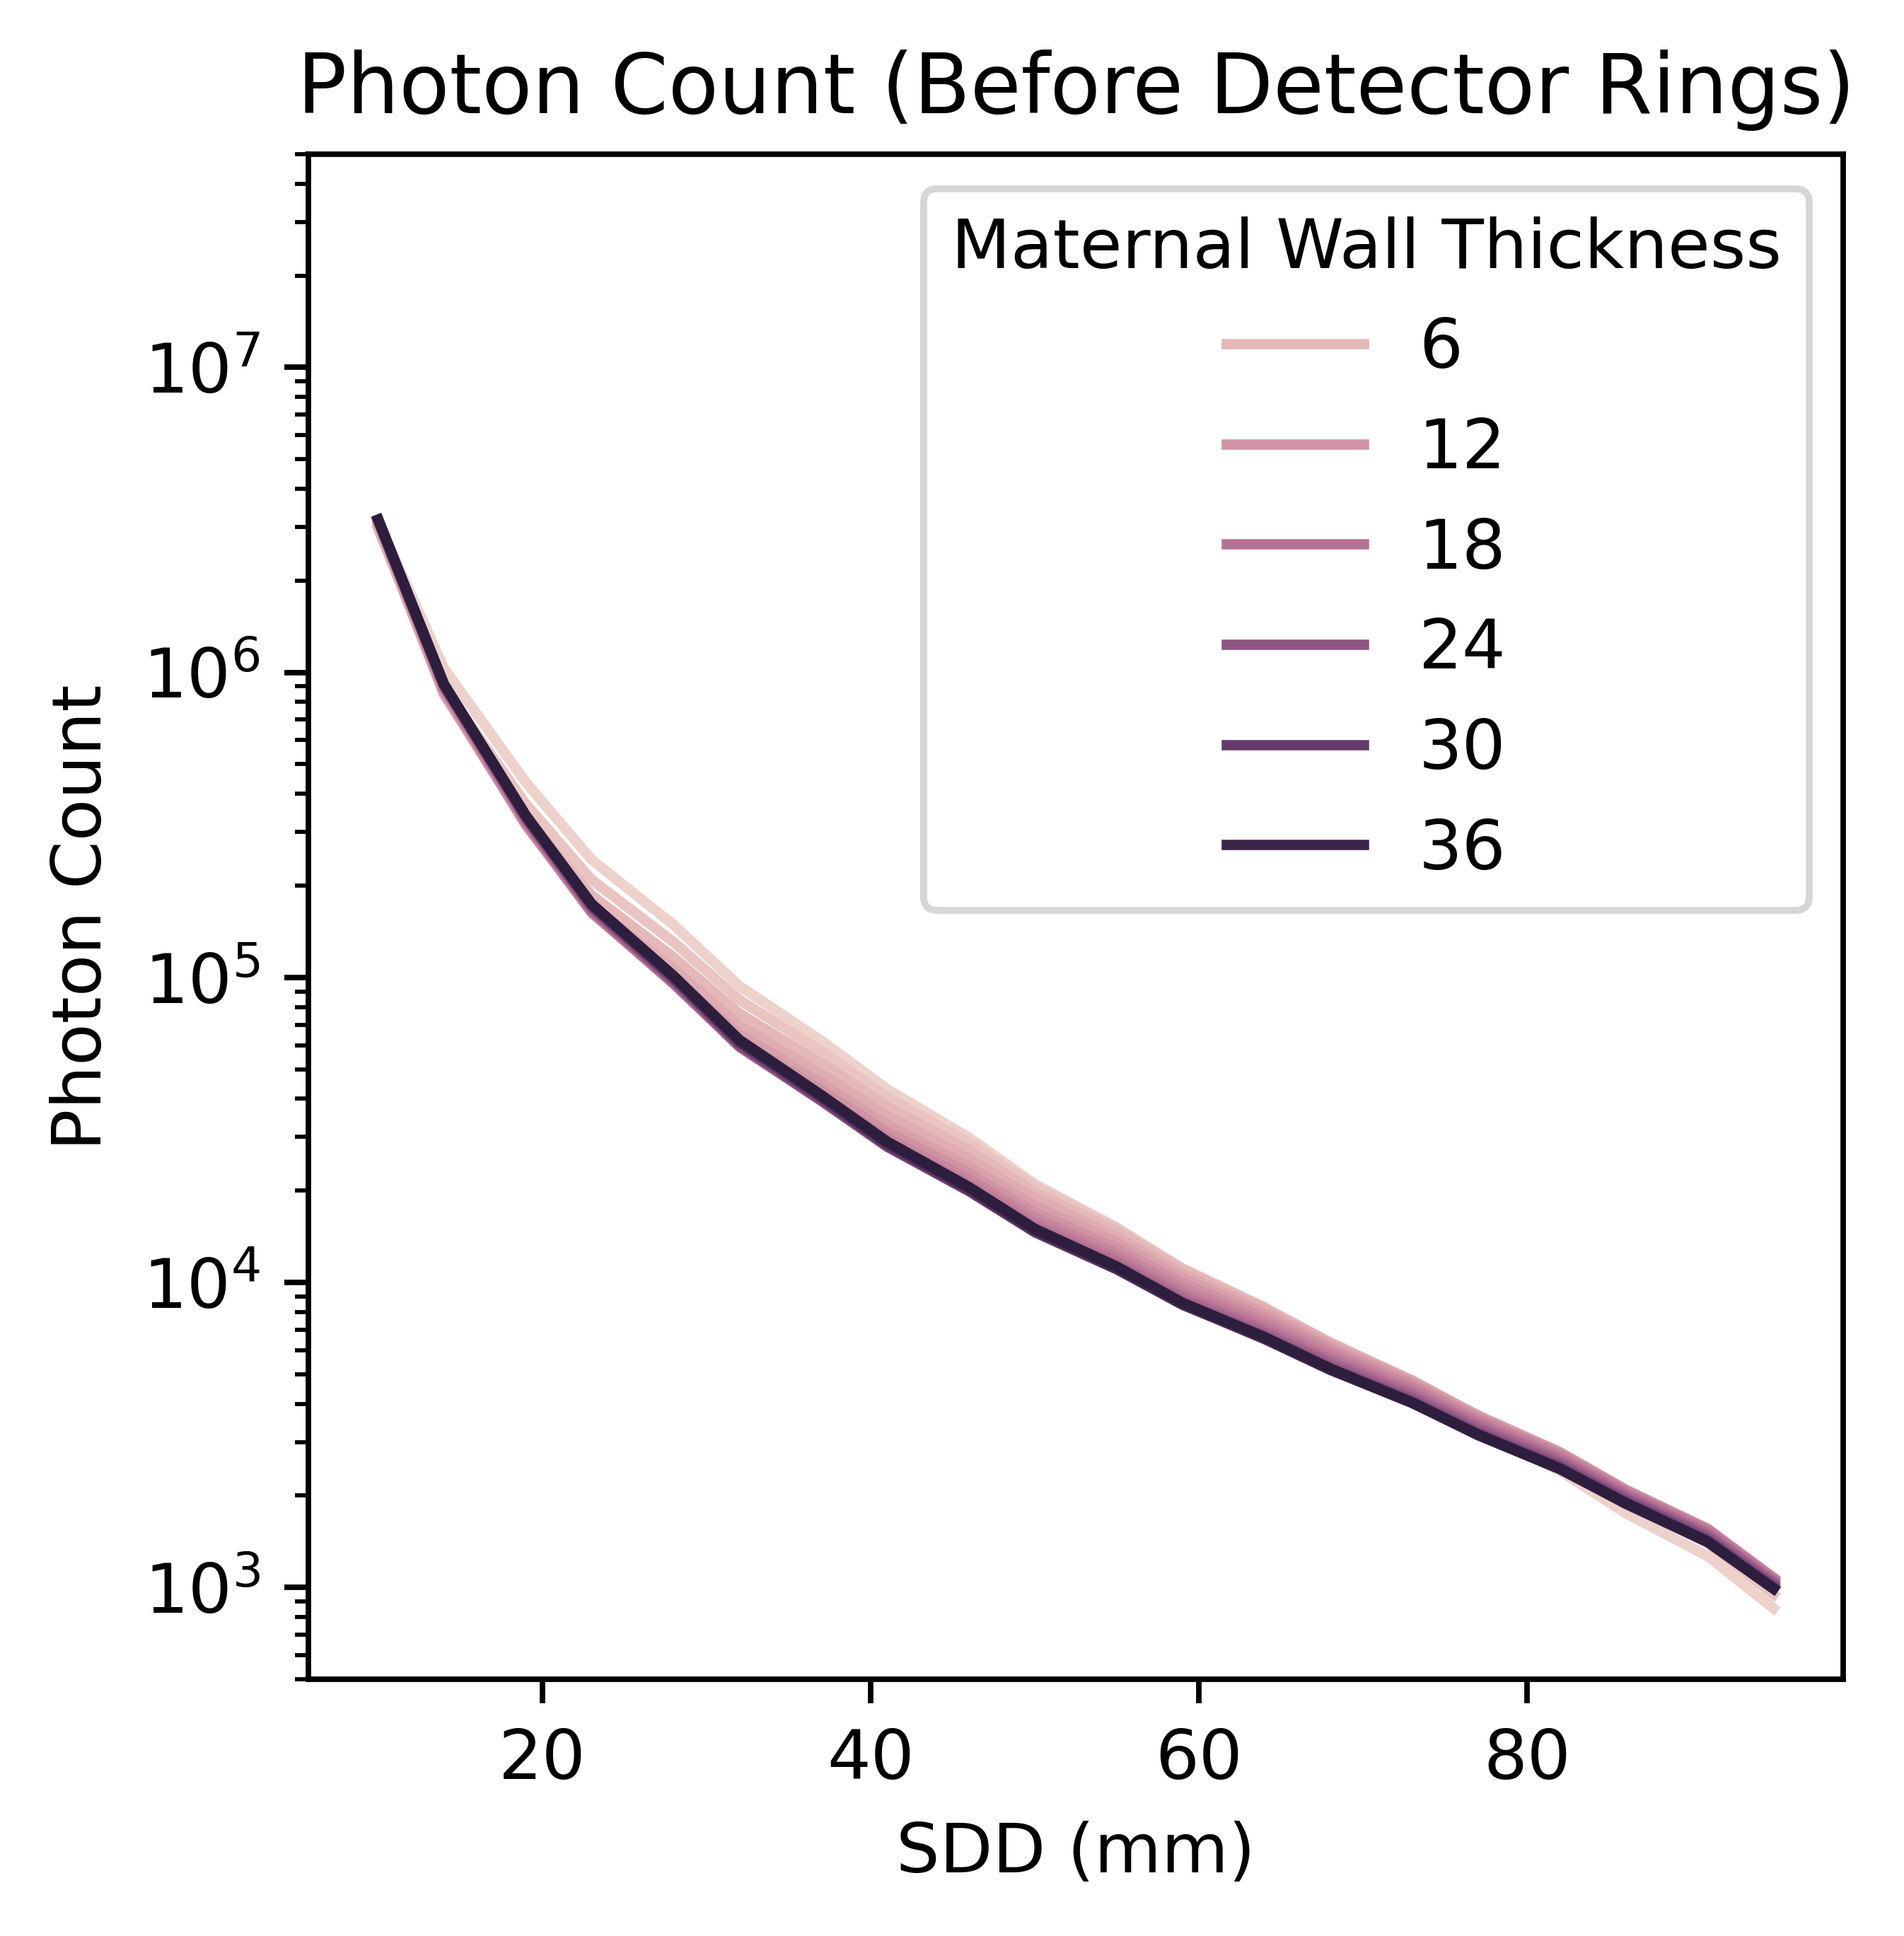

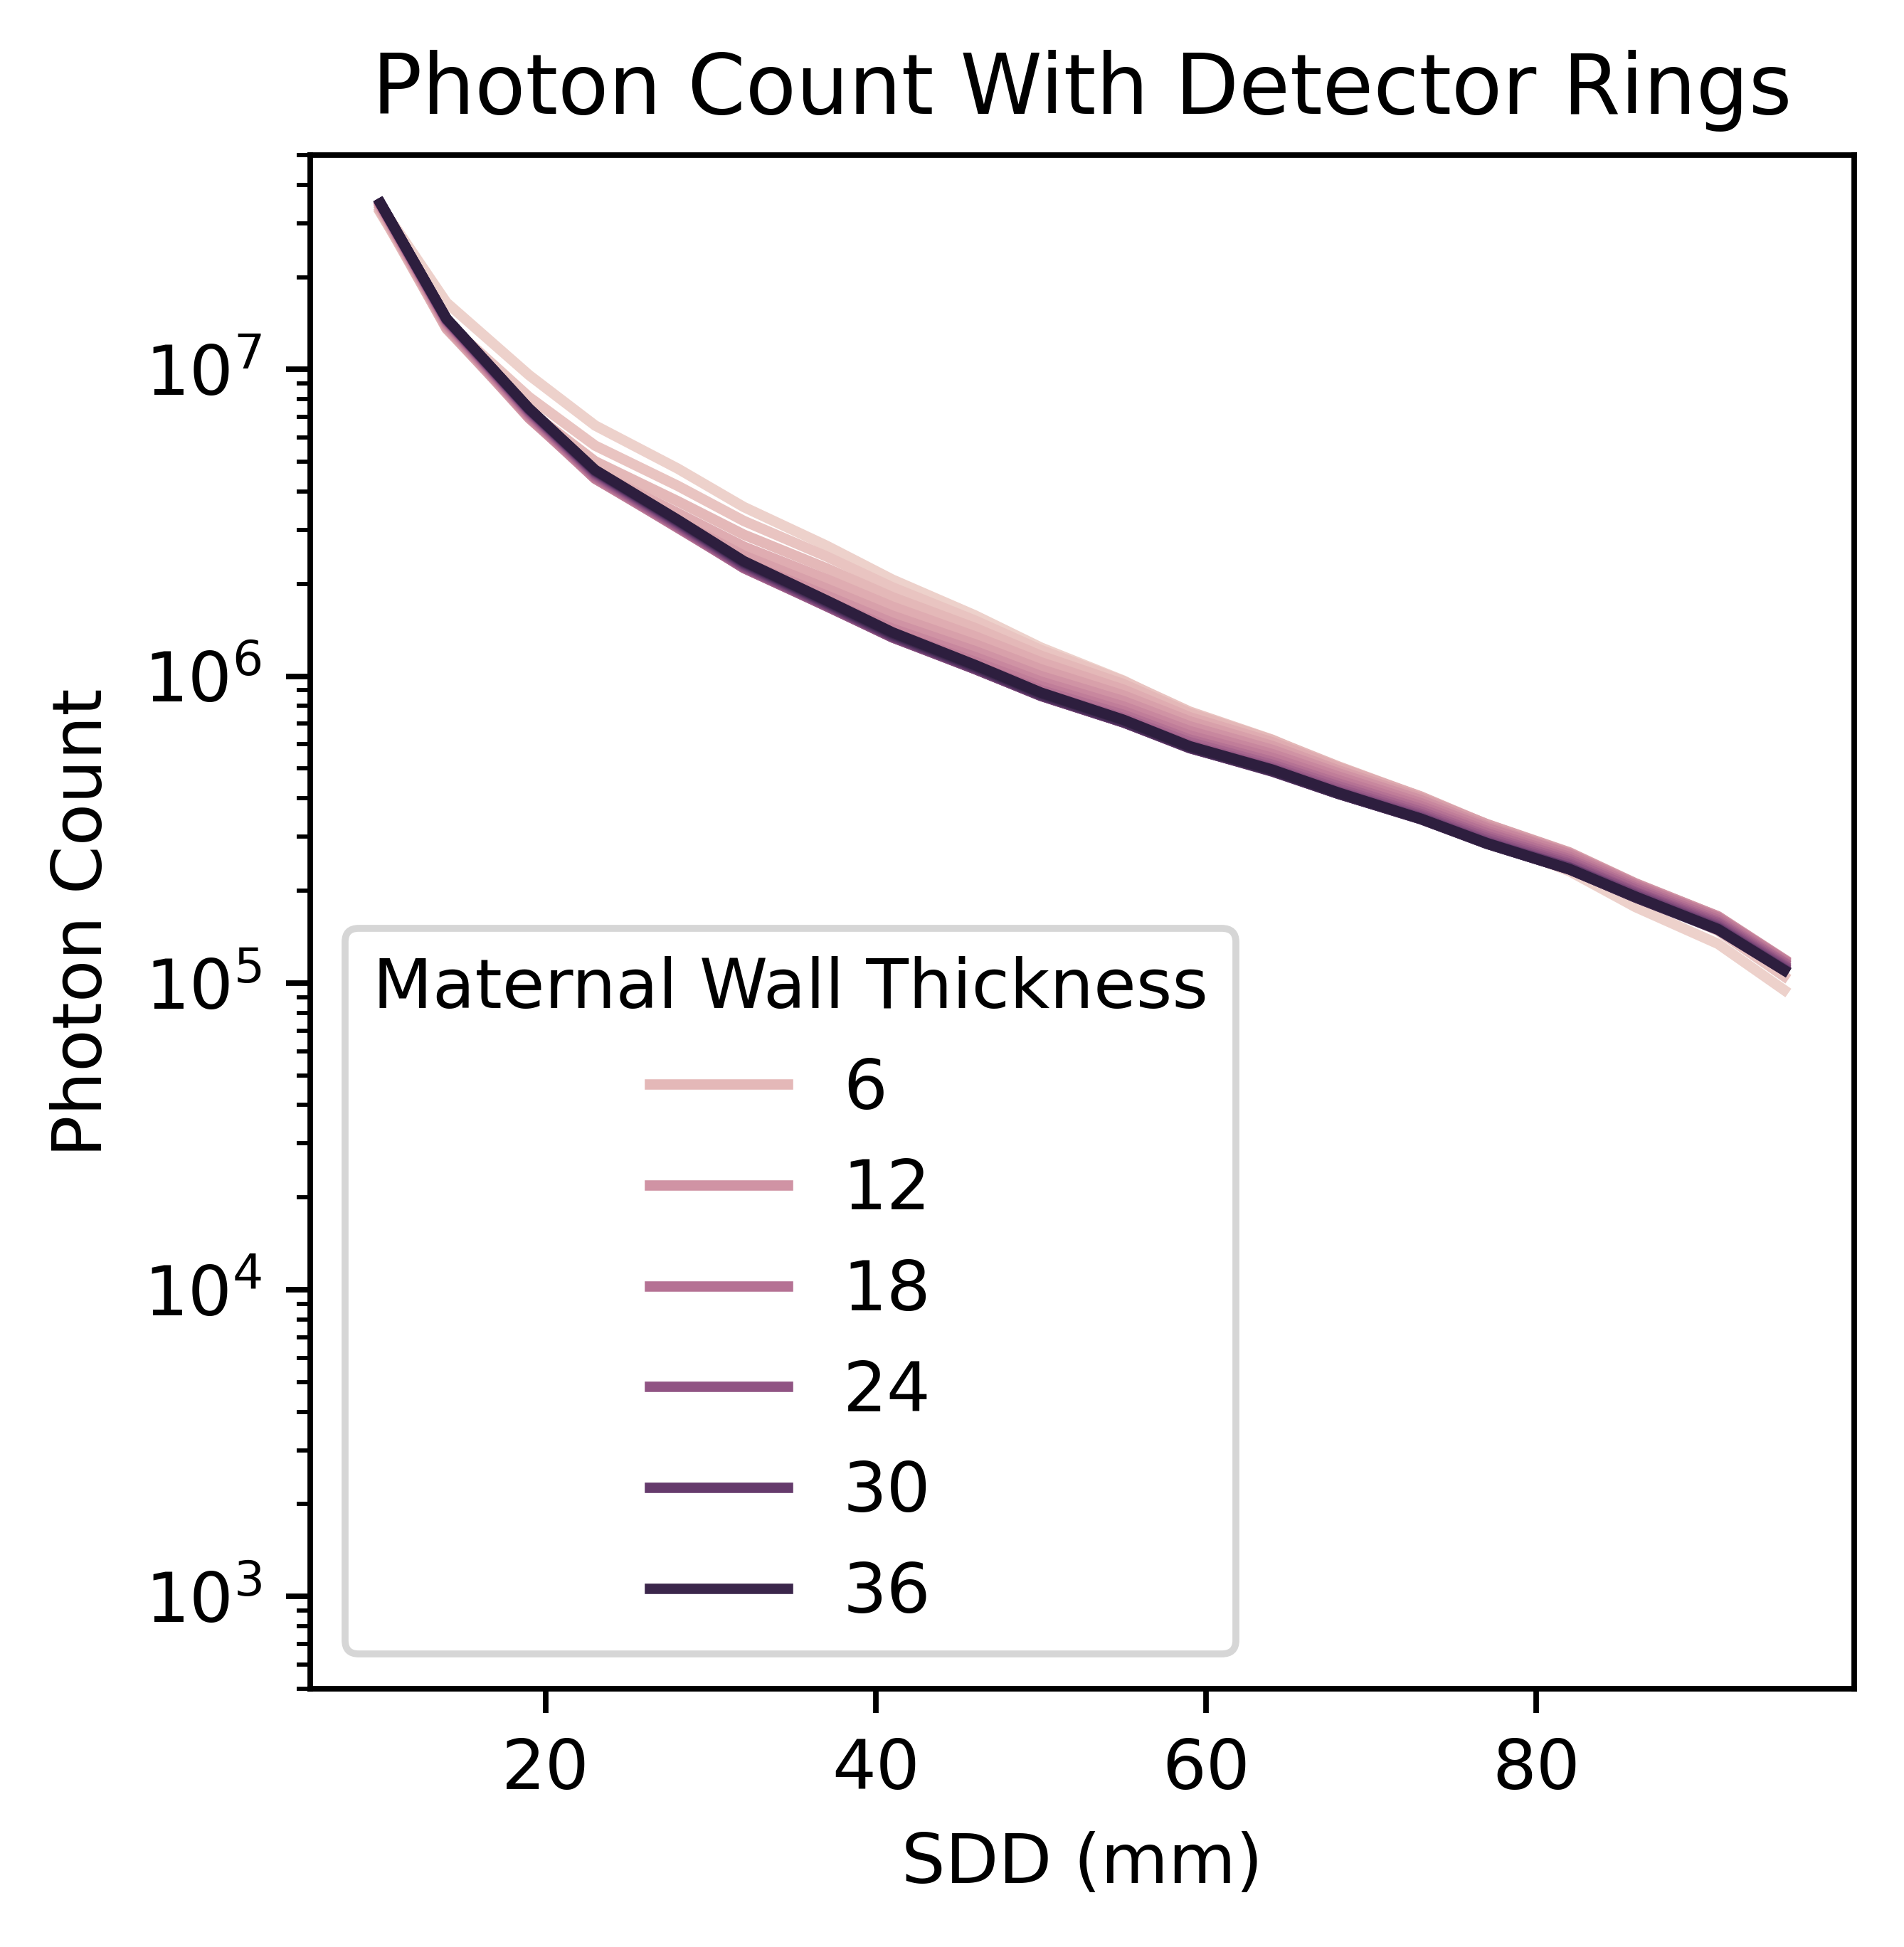

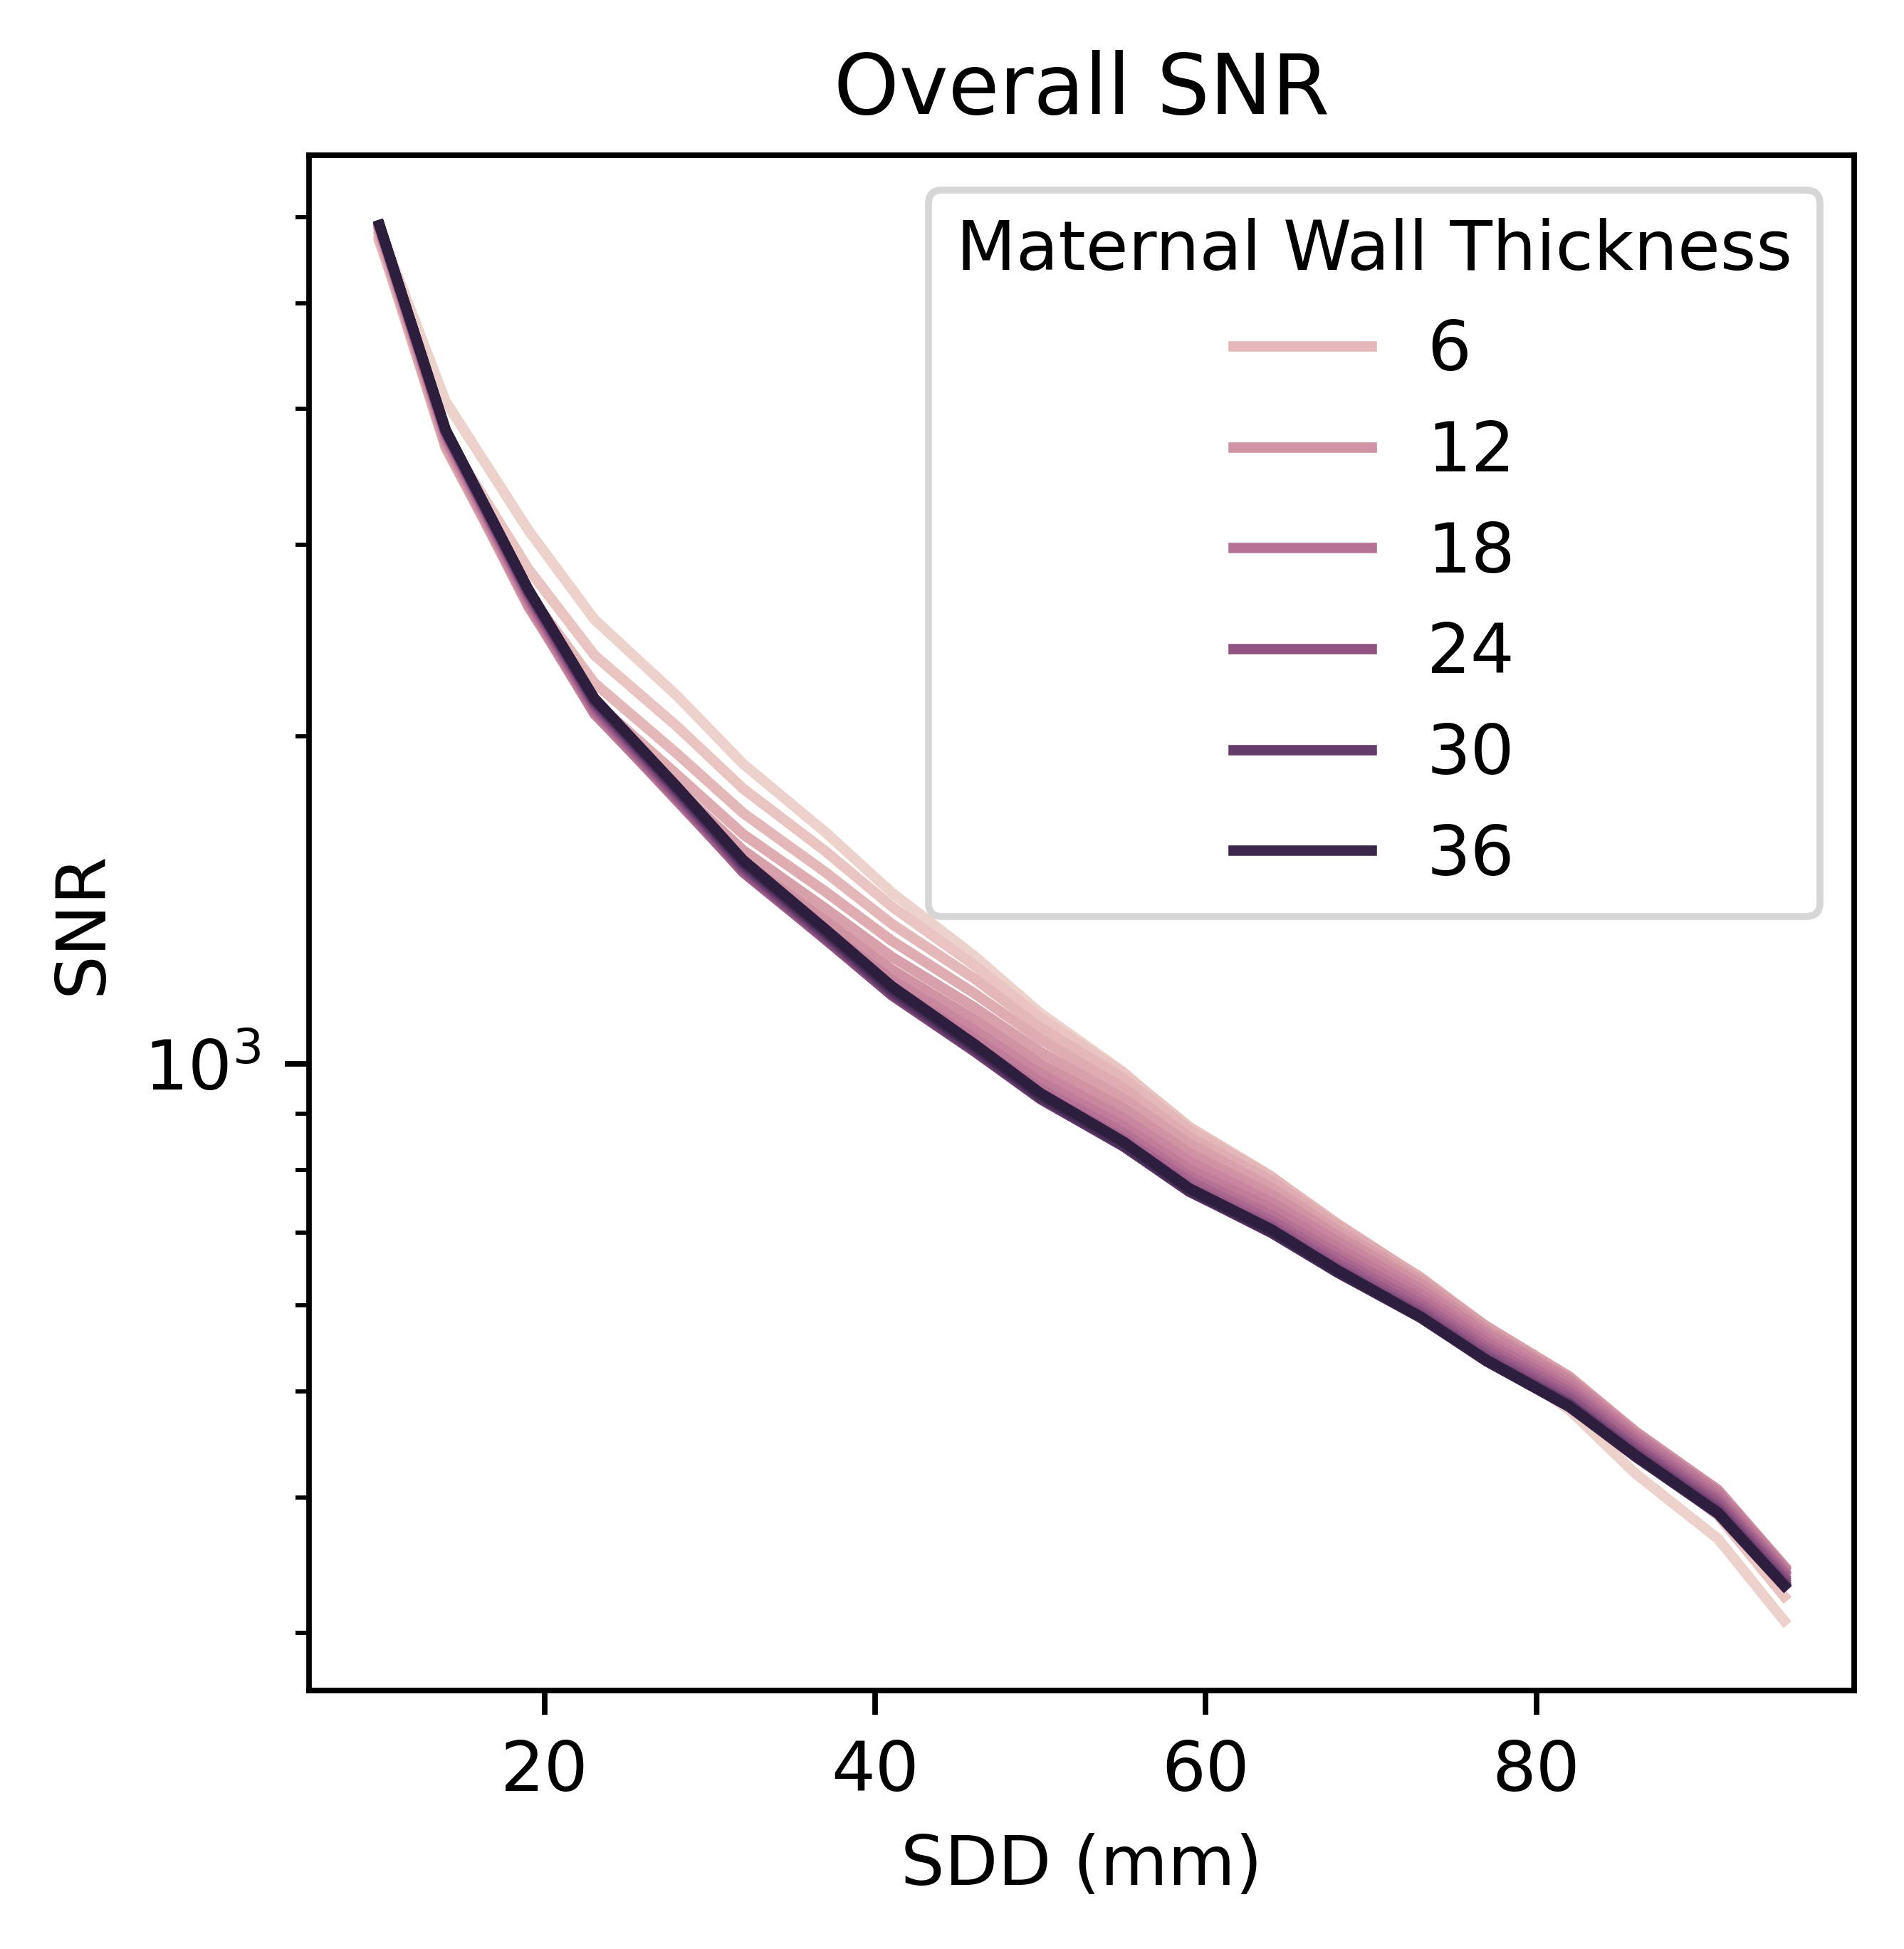

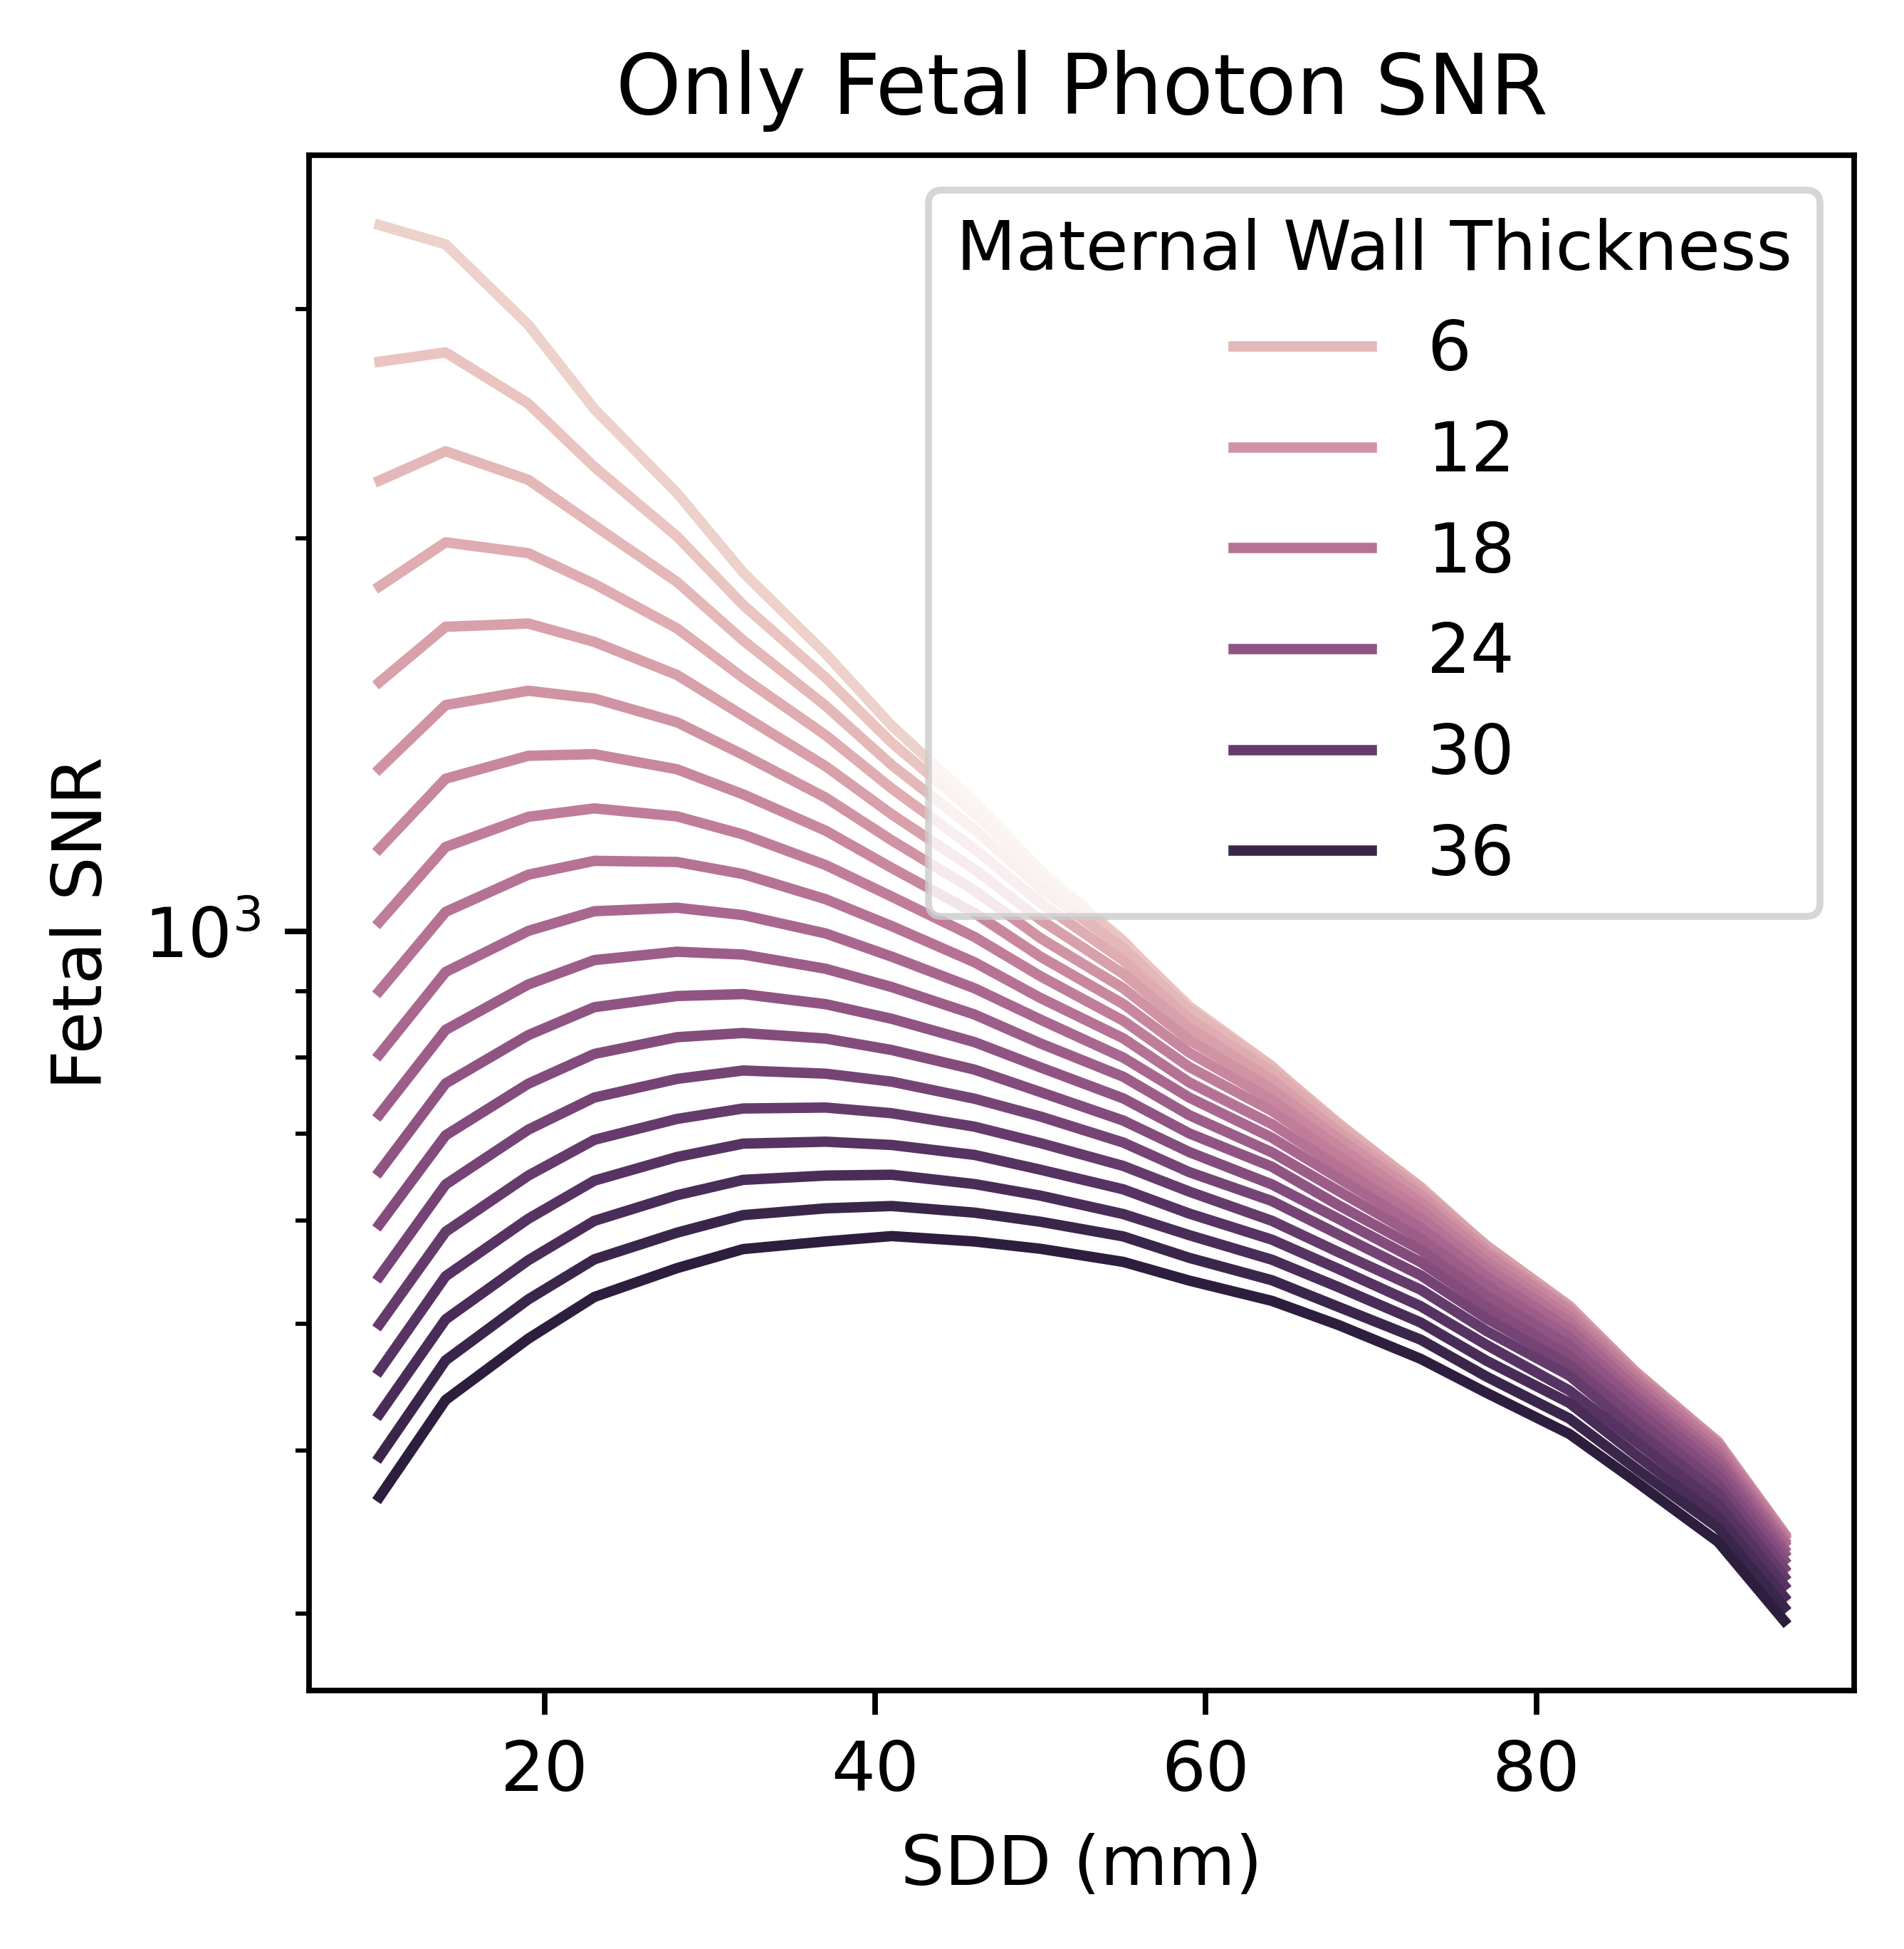

In [4]:
from inverse_modelling_tfo.data import EQUIDISTANCE_DETECTOR_COUNT

filtered_data = snr_data[(snr_data['Wave Int'] == 2)].copy()
# Without detector rings
sdd = snr_data['SDD'].unique()
sdd.sort()
sdd_to_detector_count_map = {
    dist: count for dist, count in zip(sdd, EQUIDISTANCE_DETECTOR_COUNT)}
filtered_data['SNR0'] = filtered_data['SNR'] / filtered_data['SDD'].map(sdd_to_detector_count_map)
plt.figure(figsize=FIG_SIZE, dpi=FIG_DPI)
plt.title('Photon Count (Before Detector Rings)')
sns.lineplot(data=filtered_data, x='SDD', y='SNR0', hue='Maternal Wall Thickness', markers=True)
plt.ylabel("Photon Count")
plt.yscale('log')
plt.xlabel('SDD (mm)')
plt.ylim([5e2, 5e7])    # Set same limits to make the plots look comparable side-by-side


# With Detector Rings
plt.figure(figsize=FIG_SIZE, dpi=FIG_DPI)
plt.title('Photon Count With Detector Rings')
sns.lineplot(data=filtered_data, x='SDD', y='SNR', hue='Maternal Wall Thickness', markers=True)
plt.ylabel("Photon Count")
plt.yscale('log')
plt.xlabel('SDD (mm)')
plt.ylim([5e2, 5e7])    # Set same limits to make the plots look comparable side-by-side

filtered_data['SNR2'] = filtered_data['SNR'].pow(1/2)
plt.figure(figsize=FIG_SIZE, dpi=FIG_DPI)
plt.title('Overall SNR')
sns.lineplot(data=filtered_data, x='SDD', y='SNR2', hue='Maternal Wall Thickness', markers=True)
plt.ylabel("SNR")
plt.yscale('log')
plt.xlabel('SDD (mm)')

filtered_data['SNR3'] = filtered_data['Fetal SNR'].pow(1/2)
plt.figure(figsize=FIG_SIZE, dpi=FIG_DPI)
plt.title('Only Fetal Photon SNR')
sns.lineplot(data=filtered_data, x='SDD', y='SNR3', hue='Maternal Wall Thickness', markers=True)
plt.ylabel("Fetal SNR")
plt.yscale('log')
plt.xlabel('SDD (mm)')
